In [8]:
import tensorflow as tf
import keras as keras
import matplotlib.pyplot as plt
import numpy as np
import os
import deepdish.io as io
from sklearn.metrics import roc_curve, auc
import random

In [9]:
tf.__version__

'1.14.0'

In [13]:
data_Mix_Train = io.load(os.path.join('/home/debo/forgit/DarkMachineTrain.h5'))
data_Mix_Test = io.load(os.path.join('/home/debo/forgit/DarkMachineTest.h5'))
data_bkg_Train = io.load(os.path.join('/home/debo/forgit/X_bkgTrain.h5'))
data_bkg_Test = io.load(os.path.join('/home/debo/forgit/X_bkgTest.h5'))

In [14]:
X_Mix_train = data_Mix_Train['X']
y_Mix_train = data_Mix_Train['y']
X_Mix_test = data_Mix_Test['X']
y_Mix_test = data_Mix_Test['y']

X_bkg_train = data_bkg_Train['X']
X_bkg_test = data_bkg_Test['X']

X_Mix_train_N = keras.utils.normalize(X_Mix_train, axis=1)
X_Mix_test_N = keras.utils.normalize(X_Mix_test, axis=1)

X_bkg_train_N = keras.utils.normalize(X_bkg_train, axis=1)
X_bkg_test_N = keras.utils.normalize(X_bkg_test, axis=1)

In [15]:
print("X_Mix_train_N: ",X_Mix_train_N.shape)
print("X_Mix_test_N: ",X_Mix_test_N.shape)
print("y_Mix_train_N: ",y_Mix_train.shape)
print("y_Mix_test_N: ",y_Mix_test.shape)

print("X_bkg_train_N: ",X_bkg_train_N.shape)
print("X_bkg_test_N: ",X_bkg_test_N.shape)

('X_Mix_train_N: ', (2420718, 113))
('X_Mix_test_N: ', (806907, 113))
('y_Mix_train_N: ', (2420718, 1))
('y_Mix_test_N: ', (806907, 1))
('X_bkg_train_N: ', (1739535, 113))
('X_bkg_test_N: ', (434884, 113))


In [30]:
input_img = keras.models.Input(shape=(113,))
encoded = keras.layers.Dense(128, activation= tf.nn.relu)(input_img)
encoded = keras.layers.Dense(64, activation= tf.nn.relu)(encoded)
encoded = keras.layers.Dense(32, activation= tf.nn.relu)(encoded)
encoded = keras.layers.Dense(16, activation= tf.nn.relu)(encoded) #the latent layer 
decoded = keras.layers.Dense(64, activation= tf.nn.relu)(encoded)
decoded = keras.layers.Dense(128, activation= tf.nn.relu)(decoded)
decoded = keras.layers.Dense(113, activation= tf.nn.sigmoid)(decoded)

encoder = keras.Model(input_img, encoded)
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(X_bkg_train_N, X_bkg_train_N,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(X_bkg_test_N, X_bkg_test_N))

Train on 1739535 samples, validate on 434884 samples
Epoch 1/20
1739535/1739535 [==============================] - 45s 26us/step - loss: 0.0434 - val_loss: 0.0374
Epoch 2/20
1739535/1739535 [==============================] - 43s 25us/step - loss: 0.0364 - val_loss: 0.0360
Epoch 3/20
1739535/1739535 [==============================] - 44s 25us/step - loss: 0.0355 - val_loss: 0.0354
Epoch 4/20
1739535/1739535 [==============================] - 42s 24us/step - loss: 0.0347 - val_loss: 0.0344
Epoch 5/20
1739535/1739535 [==============================] - 44s 25us/step - loss: 0.0342 - val_loss: 0.0341
Epoch 6/20
1739535/1739535 [==============================] - 44s 25us/step - loss: 0.0338 - val_loss: 0.0337
Epoch 7/20
1739535/1739535 [==============================] - 43s 25us/step - loss: 0.0336 - val_loss: 0.0336
Epoch 8/20
1739535/1739535 [==============================] - 43s 25us/step - loss: 0.0334 - val_loss: 0.0333
Epoch 9/20
1739535/1739535 [==============================] - 42s 2

In [31]:
autoencoder.save('DarkMachine_autoencoder.model')
encoder.save('DarkMachine_encoder.model')

In [32]:
encoder_model = keras.models.load_model('DarkMachine_encoder.model')

In [33]:
enCoded_X_Mix_train_N = encoder_model.predict([X_Mix_train_N])
enCoded_X_Mix_test_N = encoder_model.predict([X_Mix_test_N])

In [34]:
enCoded_X_Mix_train_N.shape

(2420718, 16)

In [36]:
seqModel = keras.models.Sequential()
seqModel.add(keras.layers.Dense(128, input_dim=16, activation= tf.nn.relu))
seqModel.add(keras.layers.Dense(64, activation= tf.nn.relu))
seqModel.add(keras.layers.Dense(32, activation= tf.nn.relu))
seqModel.add(keras.layers.Dense(16, activation= tf.nn.relu))
seqModel.add(keras.layers.Dense(8, activation= tf.nn.relu))
seqModel.add(keras.layers.Dense(1, activation= tf.nn.sigmoid))
seqModel.compile(loss='binary_crossentropy', optimizer='adam', metrics= ['accuracy'])

seqModel.fit(enCoded_X_Mix_train_N, y_Mix_train, batch_size=256, epochs=20)


Epoch 1/20
2420718/2420718 [==============================] - 26s 11us/step - loss: 0.2071 - acc: 0.9170
Epoch 2/20
2420718/2420718 [==============================] - 25s 10us/step - loss: 0.1656 - acc: 0.9362
Epoch 3/20
2420718/2420718 [==============================] - 25s 10us/step - loss: 0.1512 - acc: 0.9426
Epoch 4/20
2420718/2420718 [==============================] - 25s 10us/step - loss: 0.1420 - acc: 0.9466
Epoch 5/20
2420718/2420718 [==============================] - 25s 10us/step - loss: 0.1352 - acc: 0.9496
Epoch 6/20
2420718/2420718 [==============================] - 25s 10us/step - loss: 0.1289 - acc: 0.9524
Epoch 7/20
2420718/2420718 [==============================] - 25s 10us/step - loss: 0.1236 - acc: 0.9549
Epoch 8/20
2420718/2420718 [==============================] - 25s 10us/step - loss: 0.1204 - acc: 0.9562
Epoch 9/20
2420718/2420718 [==============================] - 25s 10us/step - loss: 0.1184 - acc: 0.9570
Epoch 10/20
2420718/2420718 [==========================

In [37]:
sig_predict = seqModel.predict(enCoded_X_Mix_test_N,batch_size=256, verbose=1)

806907/806907 [==============================] - 3s 4us/step


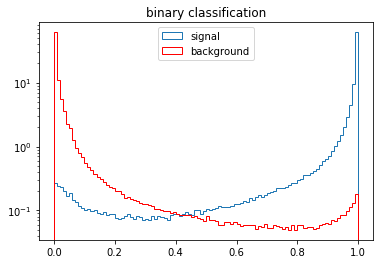

In [38]:
sigSoft= sig_predict[np.where(y_Mix_test==1)]
bkgSoft = sig_predict[np.where(y_Mix_test==0)]
_=plt.hist(sigSoft,bins=100, histtype='step', label='signal', normed = 1)
                           
_=plt.hist(bkgSoft,bins=100, histtype='step', color= 'red', label='background', normed = 1)

_=plt.yscale('log')

_=plt.legend(loc='upper center')

_=plt.title('binary classification')

/home/debo/env_autoencoder/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in divide
  after removing the cwd from sys.path.


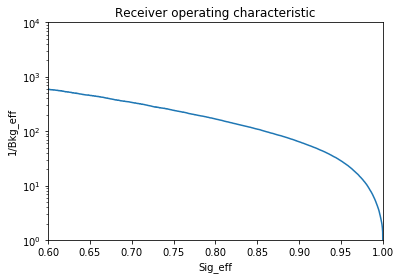

In [46]:
fpr, tpr, thresholds = roc_curve(y_Mix_test,sig_predict)
plt.figure()
##plt.plot(fpr, tpr)
plt.plot(tpr, 1/fpr)
plt.xlim([0.6, 1])
plt.ylim([1, 10000])
plt.ylabel('1/Bkg_eff')
plt.xlabel('Sig_eff')
plt.title('Receiver operating characteristic')
plt.yscale('log')
plt.show()

In [49]:
print "roc_auc =", auc(fpr, tpr)

roc_auc = 0.9908453656406427
